In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kota
cities = ['Jakarta', 'Bogor', 'Pamulang', 'Ciamis', 'Bandung']

# API key
api_key = 'dcf4925392c4ba2891a8abde9944010a'
url = 'https://api.openweathermap.org/data/2.5/weather'

# Simpan data
weather_data = []

for city in cities:
    params = {'q': city, 'appid': api_key, 'units': 'metric'}
    response = requests.get(url, params=params)
    data = response.json()
    weather_data.append({
        'City': city,
        'Temperature': data['main']['temp'],
        'Humidity': data['main']['humidity'],
        'Weather': data['weather'][0]['description']
    })

# Simpan ke CSV
df = pd.DataFrame(weather_data)
df.to_csv('weather_data.csv', index=False)

In [2]:
df = pd.read_csv('weather_data.csv')

In [3]:
temperatures = np.array(df['Temperature'])

# Rata-rata suhu
avg_temp = df['Temperature'].mean()
print(f'Rata-rata Suhu: {avg_temp:.2f}°C')

# Kondisi cuaca paling umum
common_weather = df['Weather'].mode()[0]
print(f'Kondisi cuaca paling sering: {common_weather}')

# Standar Deviasi Suhu
std_temp = np.std(temperatures)
print(f'Standar Deviasi Suhu: {std_temp:.2f}°C')

# Suhu Median
median_temp = np.median(temperatures)
print(f'Median Suhu: {median_temp:.2f}°C')

# Suhu Tertinggi dan Terendah
max_temp = np.max(temperatures)
min_temp = np.min(temperatures)
print(f'Suhu Tertinggi: {max_temp}°C')
print(f'Suhu Terendah: {min_temp}°C')

# Variasi Suhu
variance_temp = np.var(temperatures)
print(f'Variasi Suhu: {variance_temp:.2f}')

Rata-rata Suhu: 27.49°C
Kondisi cuaca paling sering: moderate rain
Standar Deviasi Suhu: 1.72°C
Median Suhu: 28.12°C
Suhu Tertinggi: 29.2°C
Suhu Terendah: 24.94°C
Variasi Suhu: 2.96


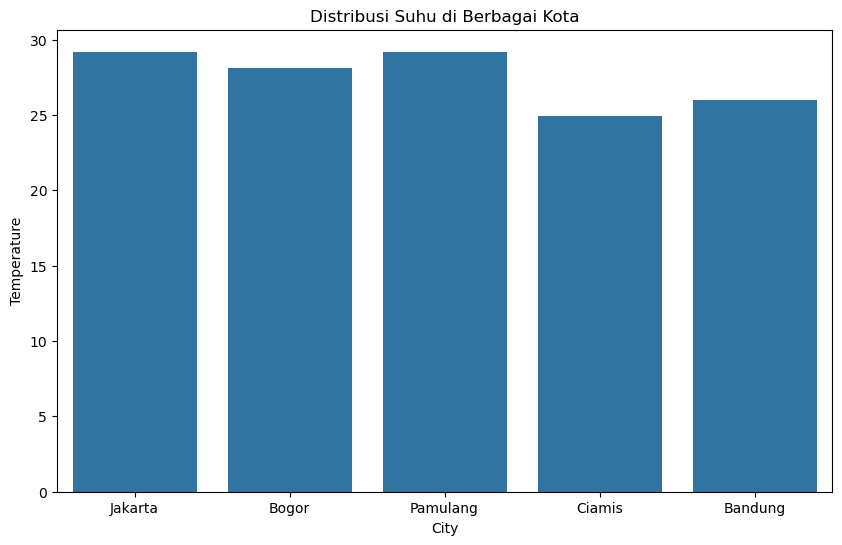

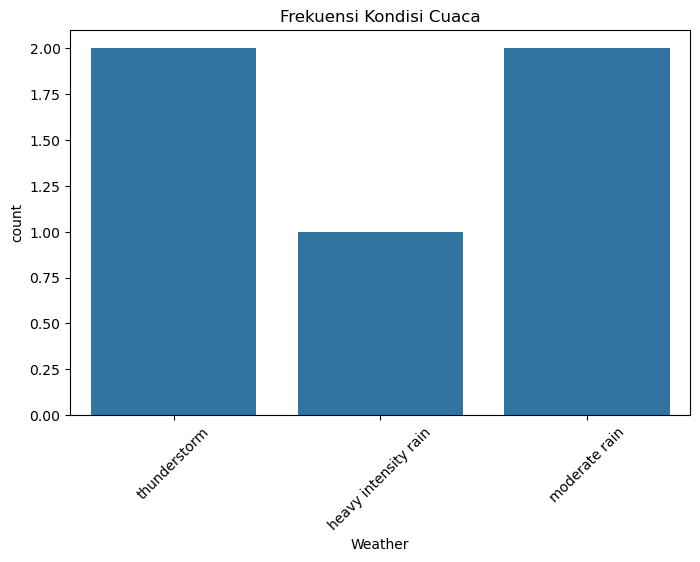

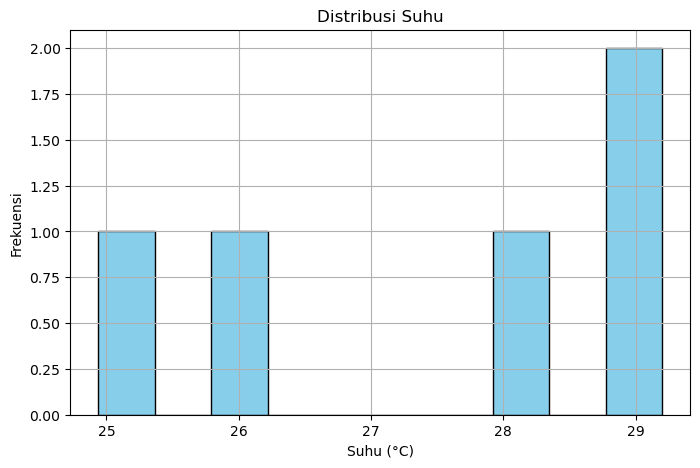

In [5]:
# Visualisasi distribusi suhu
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Temperature', data=df)
plt.title('Distribusi Suhu di Berbagai Kota')
plt.show()

# Visualisasi kondisi cuaca
plt.figure(figsize=(8, 5))
sns.countplot(x='Weather', data=df)
plt.title('Frekuensi Kondisi Cuaca')
plt.xticks(rotation=45)
plt.show()

# Histogram Distribusi Suhu
plt.figure(figsize=(8, 5))
plt.hist(temperatures, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribusi Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()
